# Lab 6.04 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 4
The file production.csv contains the production cost per unit produced. That is, producing the 100th unit costs 82 EUR and producing the 600th unit costs 34 EUR.  

1. Make the following plot  

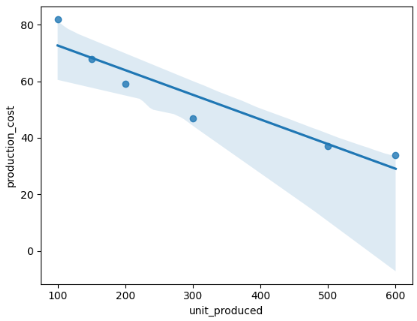

2. Based on this plot  
    1. Can you decide whether the relationship between the number of units produced and the production cost is positive / negative.   
    2. Can you decide whether the relationship between number of units produced and production costis weak / strong.  
    3. Can you decide whether $R$ will be between [-1,-0.5] / [-0.5, 0] / [0, 0.5] / [0.5,1].  
3. What is the production cost for the 400th unit?  
4. How much loss will the company incur if not a single unit is produced?  
5. How much does it cost in total to produce 1000 units  


Some answers:

- 3. the 400th unit costs 46.5051  
- 4. loss when no unit produced 81.392  
- 5. total cost for 1000 units 37739.8969

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/production.csv', delimiter=";")
df.head(20)

,unit_produced,production_cost
0,100,82
1,150,68
2,200,59
3,300,47
4,500,37
5,600,34


<Axes: xlabel='unit_produced', ylabel='production_cost'>

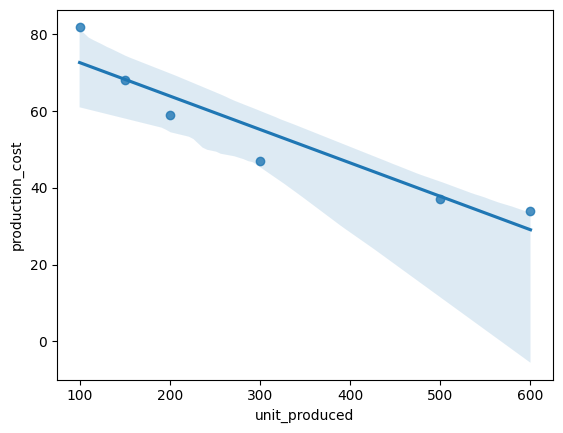

In [18]:
sns.regplot(data=df, x='unit_produced', y='production_cost')

In [19]:
r, p = stats.pearsonr(df['unit_produced'], df['production_cost'])

r_squared = r ** 2

print(f"Correlation coefficient (r): {r:.4f}")
print(f"Coefficient of determination (R²): {r_squared:.4f}")

Correlation coefficient (r): -0.9395
Coefficient of determination (R²): 0.8827


In [13]:
x = 400

In [22]:
slope, intercept, *_ = stats.linregress(*df[['unit_produced', 'production_cost']].dropna().T.values)
cost = intercept + slope * x
cost

81.39175257731958

In [10]:
(lambda y: y[1] + y[0] * x)(stats.linregress(*df[['unit_produced', 'production_cost']].dropna().T.values))

46.505154639175245

In [25]:
(lambda y: y[1] + y[0] * 0)(stats.linregress(*df[['unit_produced', 'production_cost']].dropna().T.values))

81.39175257731958

In [37]:
x = 1000

In [42]:
slope, intercept, *_ = stats.linregress(*df[['unit_produced', 'production_cost']].dropna().T.values)
cost = intercept * x + slope * (x * (x + 1) / 2)
cost

37739.896907216484

In [45]:
(lambda y: y[1] * x + y[0] * (x * (x + 1) / 2))(stats.linregress(*df[['unit_produced', 'production_cost']].dropna().T.values))

37739.896907216484

In [39]:
X = df[['unit_produced']].values
y = df['production_cost'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get slope and intercept
intercept = model.intercept_
slope = model.coef_[0]

# Display the regression equation
print(f"Regression equation: ŷ = {intercept} + {slope} * x")


units = np.arange(1, 1001).reshape(-1, 1)
total_cost_1000 = model.predict(units).sum()
print(f"Total cost for 1000 units: {total_cost_1000}")

Regression equation: ŷ = 81.3917525773196 + -0.08721649484536086 * x
Total cost for 1000 units: 37739.896907216484
